## Importing data

In [199]:
import kagglehub 


In [200]:
path = kagglehub.dataset_download("fedesoriano/stellar-classification-dataset-sdss17")

print("Path to dataset files:", path)

Path to dataset files: /home/arbiter/.cache/kagglehub/datasets/fedesoriano/stellar-classification-dataset-sdss17/versions/1


In [201]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [202]:
data_path = "~/.cache/kagglehub/datasets/fedesoriano/stellar-classification-dataset-sdss17/versions/1/star_classification.csv"

df = pd.read_csv(data_path)

In [203]:
df.head(2)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427


## EDA and data cleaning

In [204]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [205]:
df.info()   #checking the datatypes of each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [206]:
df.describe()   # checking the 

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [207]:
print(f"Rows : {df.shape[0]} \nColumns : {df.shape[1]}")

Rows : 100000 
Columns : 18


### Inspecting the data


In [208]:
df["rerun_ID"].unique()

array([301])

In [209]:
df["cam_col"].unique()  # categorical feature

array([2, 5, 3, 4, 6, 1])

### Handling missing values if any

<Axes: >

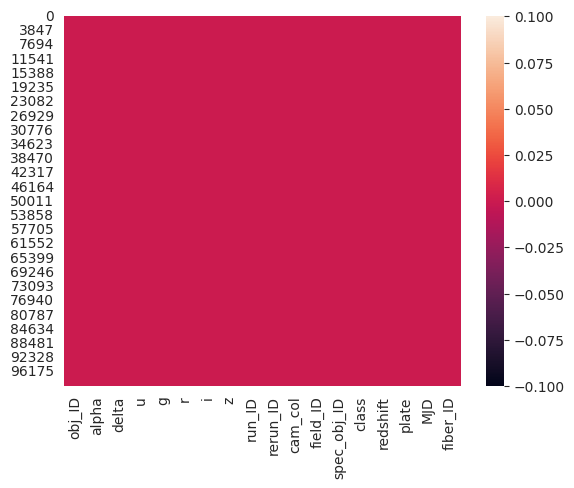

In [210]:
sns.heatmap(df.isnull())

No missing data

### Exploring data characteristics and visualizing relationships

In [211]:
correlation_matrix = df.drop("class", axis = 1).corr()

<Axes: >

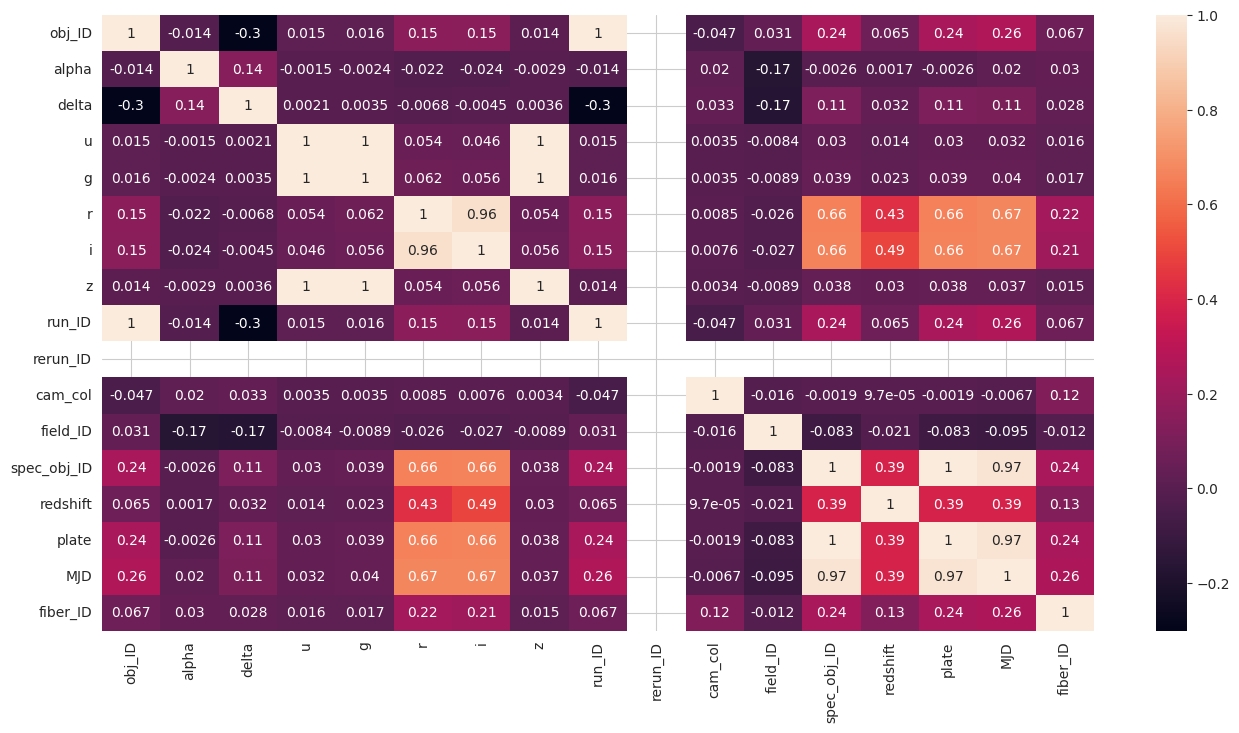

In [212]:
# Exploring correlation between the features
plt.figure(figsize= (16,8))
sns.heatmap(correlation_matrix, annot= True)

In [213]:
df.drop("rerun_ID", axis = 1, inplace = True)

In [214]:
df.head(1)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.2753,20.39501,19.16573,18.79371,3606,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171


In [215]:
df.head(1)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.2753,20.39501,19.16573,18.79371,3606,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171


In [216]:
df["class"].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

/tmp/ipykernel_1042/2116405569.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["class"] == "GALAXY"]["u"], label = "Galaxy")
/tmp/ipykernel_1042/2116405569.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["class"] == "QSO"]["u"], label = "Quasar")
/tmp/ipykernel_1042/211640556

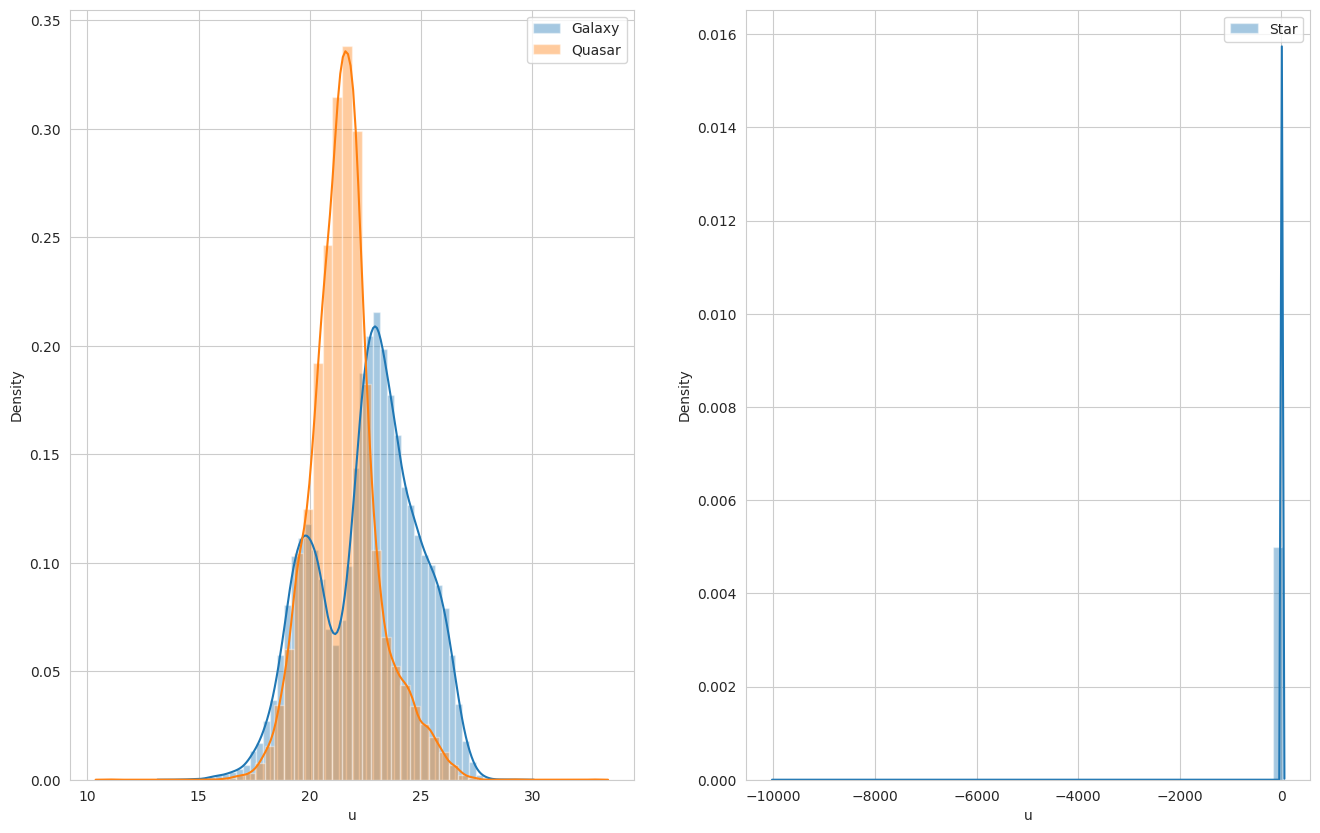

In [217]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
sns.distplot(df[df["class"] == "GALAXY"]["u"], label = "Galaxy")

sns.distplot(df[df["class"] == "QSO"]["u"], label = "Quasar")

plt.legend()

plt.subplot(1,2,2)
sns.distplot(df[df["class"] == "STAR"]["u"], label = "Star")

plt.legend()

/tmp/ipykernel_1042/3588833202.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["class"] == "GALAXY"]["g"], label = "Galaxy")
/tmp/ipykernel_1042/3588833202.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["class"] == "QSO"]["g"], label = "Quasar")
/tmp/ipykernel_1042/358883320

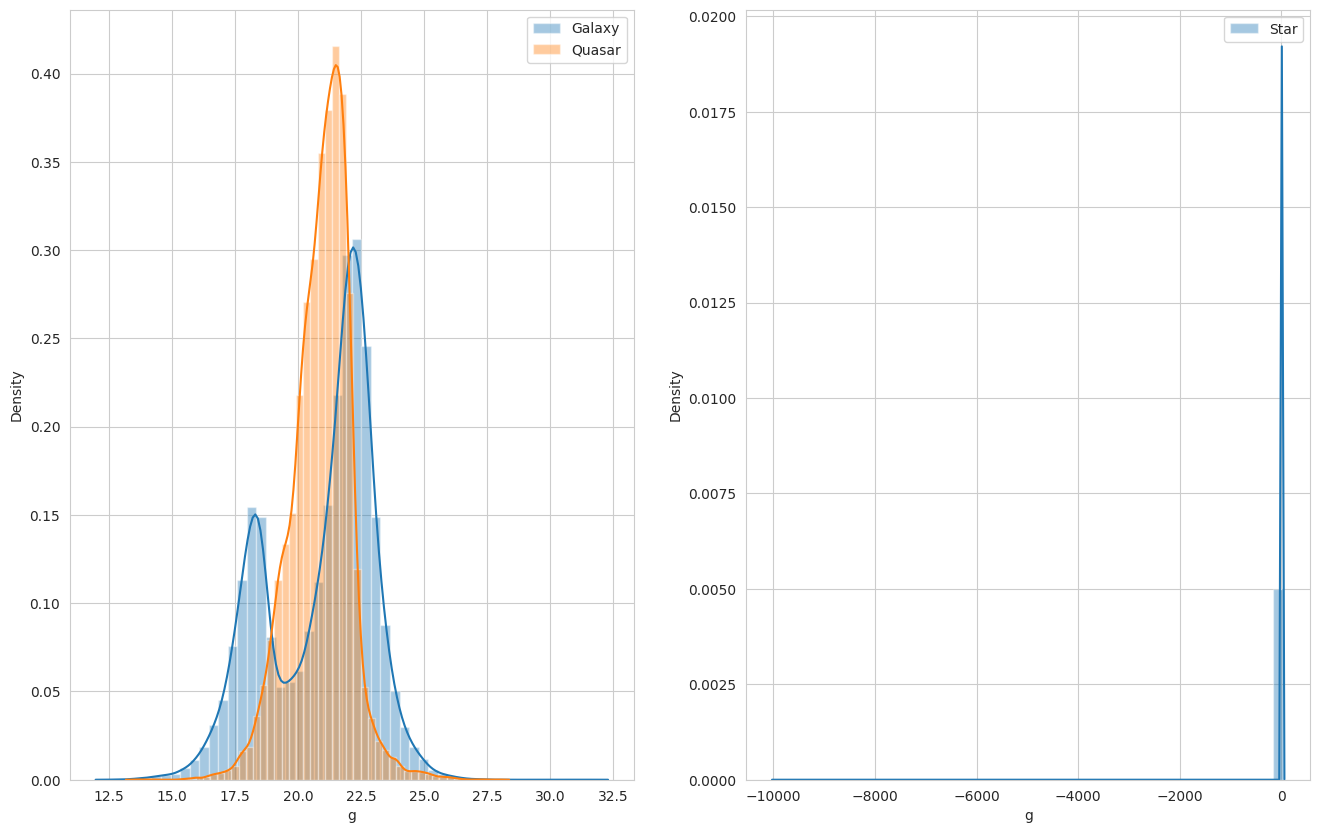

In [218]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
sns.distplot(df[df["class"] == "GALAXY"]["g"], label = "Galaxy")

sns.distplot(df[df["class"] == "QSO"]["g"], label = "Quasar")

plt.legend()

plt.subplot(1,2,2)
sns.distplot(df[df["class"] == "STAR"]["g"], label = "Star")

plt.legend()

/tmp/ipykernel_1042/3861663863.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["class"] == "GALAXY"]["r"], label = "Galaxy")
/tmp/ipykernel_1042/3861663863.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["class"] == "QSO"]["r"], label = "Quasar")
/tmp/ipykernel_1042/386166386

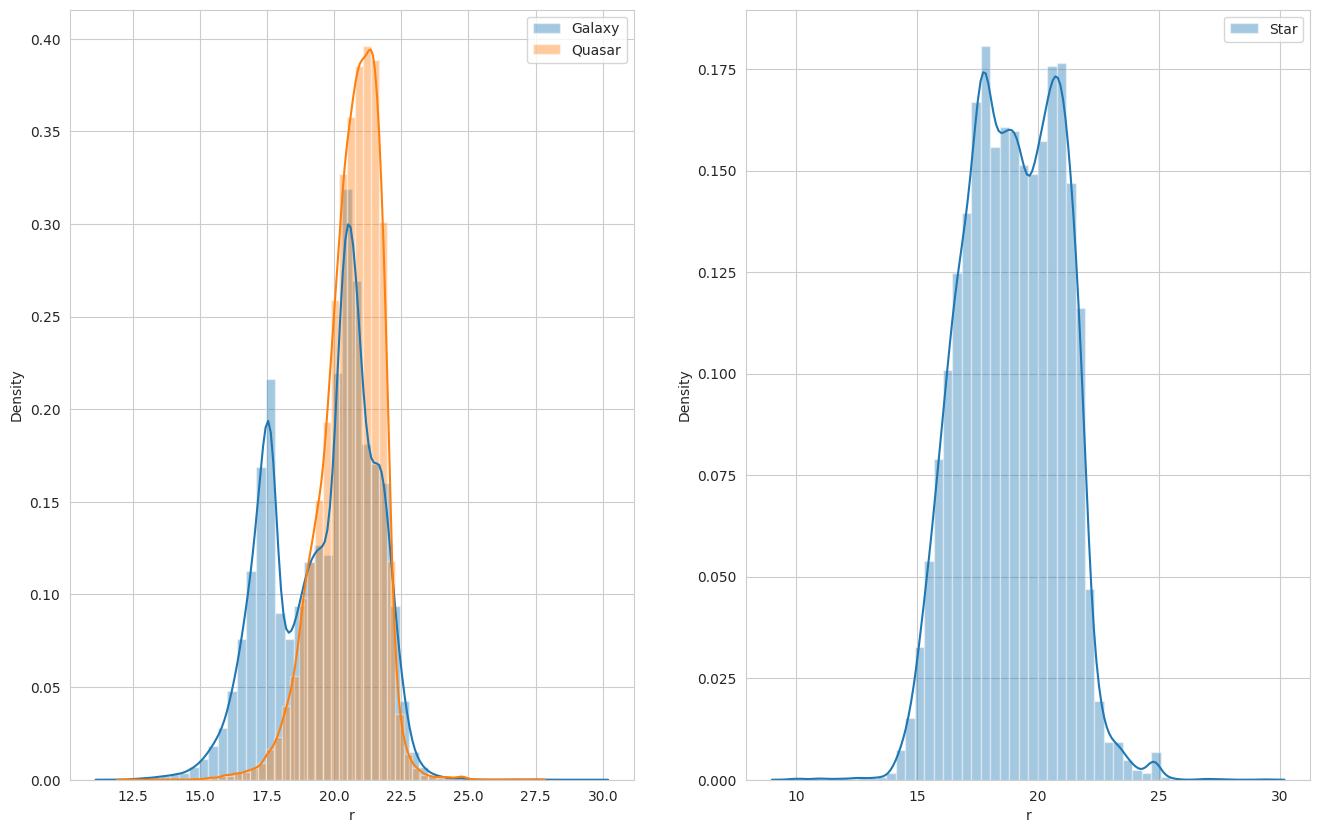

In [219]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
sns.distplot(df[df["class"] == "GALAXY"]["r"], label = "Galaxy")

sns.distplot(df[df["class"] == "QSO"]["r"], label = "Quasar")

plt.legend()

plt.subplot(1,2,2)
sns.distplot(df[df["class"] == "STAR"]["r"], label = "Star")

plt.legend()

/tmp/ipykernel_1042/2935675350.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["class"] == "GALAXY"]["i"], label = "Galaxy")
/tmp/ipykernel_1042/2935675350.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["class"] == "QSO"]["i"], label = "Quasar")
/tmp/ipykernel_1042/293567535

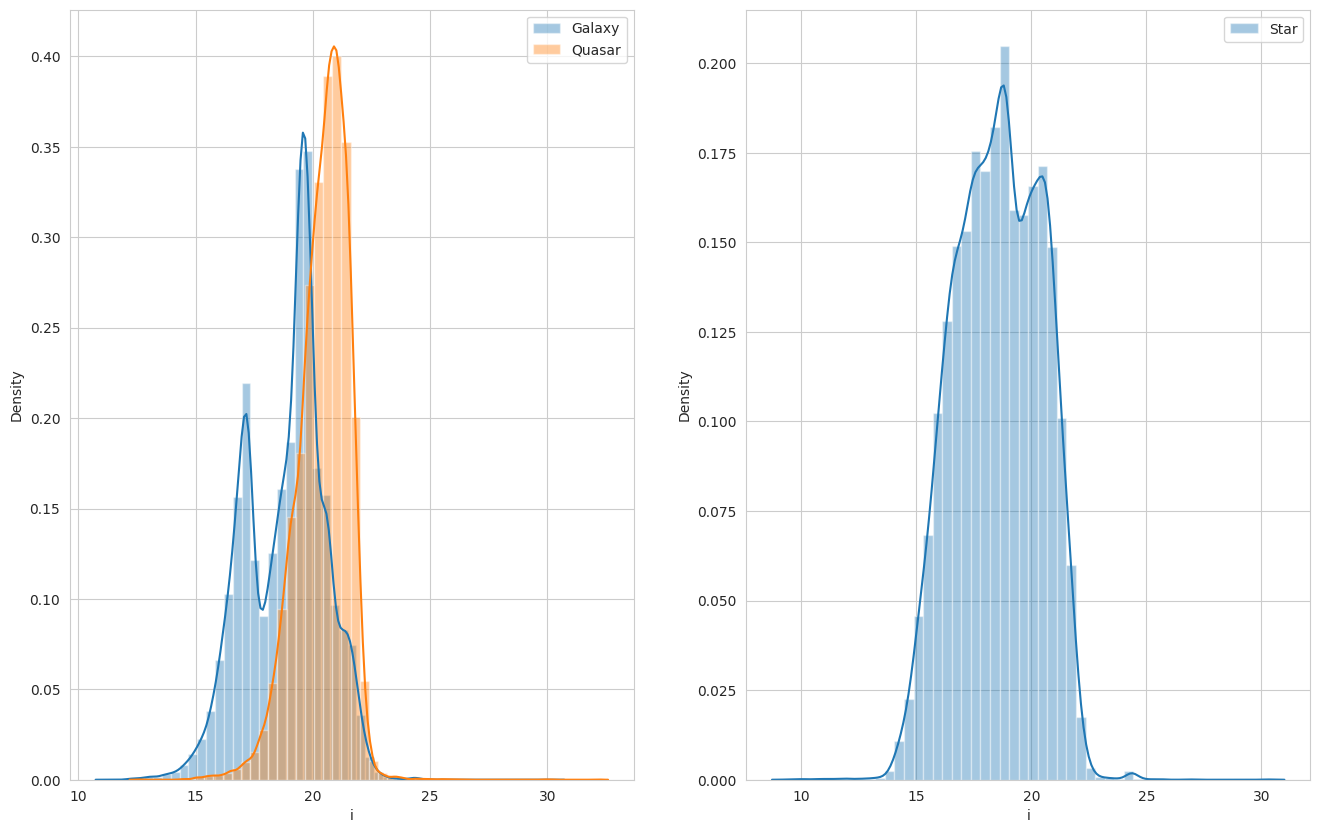

In [220]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
sns.distplot(df[df["class"] == "GALAXY"]["i"], label = "Galaxy")

sns.distplot(df[df["class"] == "QSO"]["i"], label = "Quasar")

plt.legend()

plt.subplot(1,2,2)
sns.distplot(df[df["class"] == "STAR"]["i"], label = "Star")

plt.legend()

/tmp/ipykernel_1042/1330974750.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["class"] == "GALAXY"]["z"], label = "Galaxy")
/tmp/ipykernel_1042/1330974750.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["class"] == "QSO"]["z"], label = "Quasar")
/tmp/ipykernel_1042/133097475

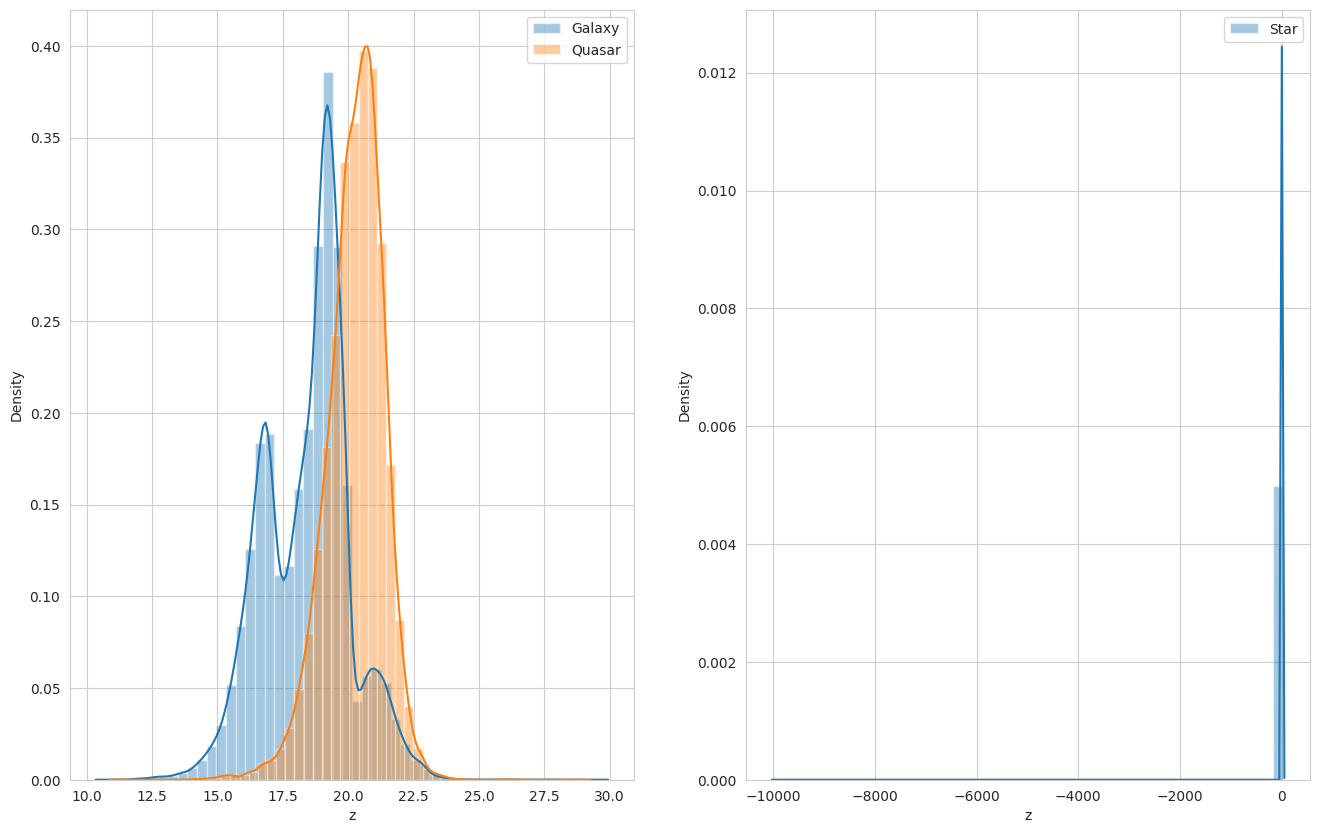

In [221]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
sns.distplot(df[df["class"] == "GALAXY"]["z"], label = "Galaxy")

sns.distplot(df[df["class"] == "QSO"]["z"], label = "Quasar")

plt.legend()

plt.subplot(1,2,2)
sns.distplot(df[df["class"] == "STAR"]["z"], label = "Star")

plt.legend()

<Axes: xlabel='class', ylabel='count'>

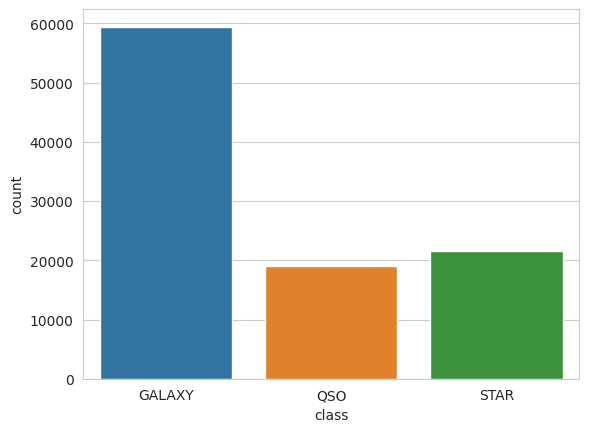

In [222]:
sns.countplot(x= df["class"], hue= df["class"])

<Axes: ylabel='class'>

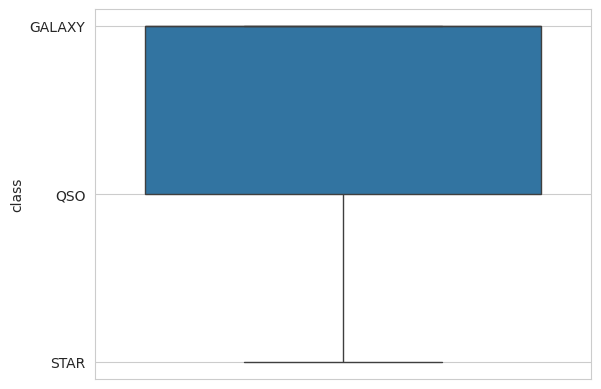

In [223]:
sns.boxplot(df["class"])

In [224]:
df["class"].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [225]:
df.head(2)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427


Outliers handling :

<Axes: xlabel='class', ylabel='u'>

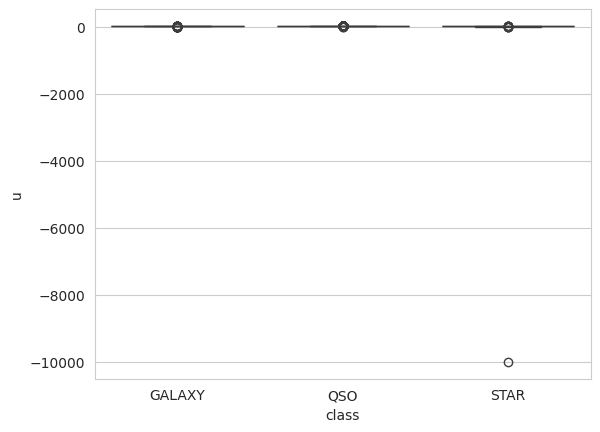

In [226]:
sns.boxplot(x = df["class"], y = df["u"], hue = df["class"])

<Axes: xlabel='class', ylabel='g'>

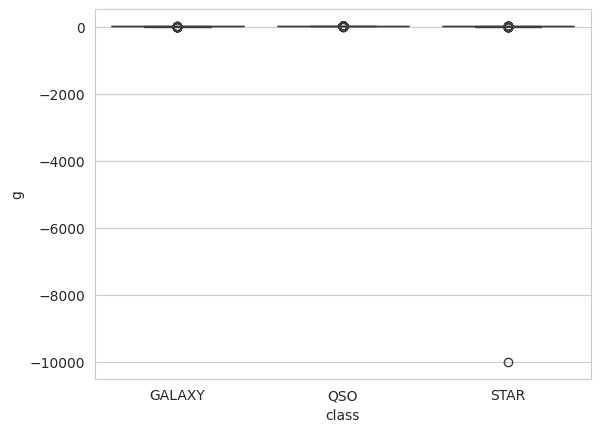

In [227]:
sns.boxplot(x = df["class"], y = df["g"], hue = df["class"])

<Axes: xlabel='class', ylabel='r'>

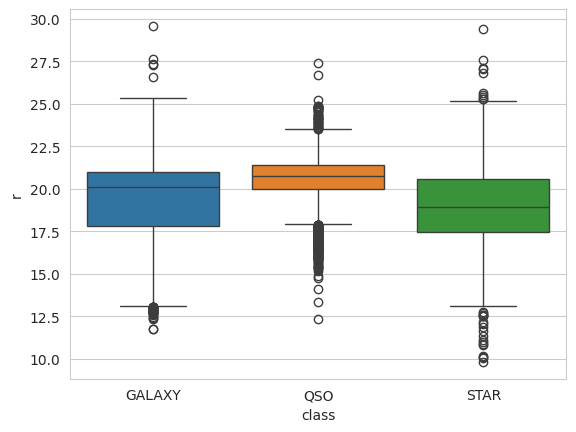

In [228]:
sns.boxplot(x = df["class"], y = df["r"], hue = df["class"])

<Axes: xlabel='class', ylabel='i'>

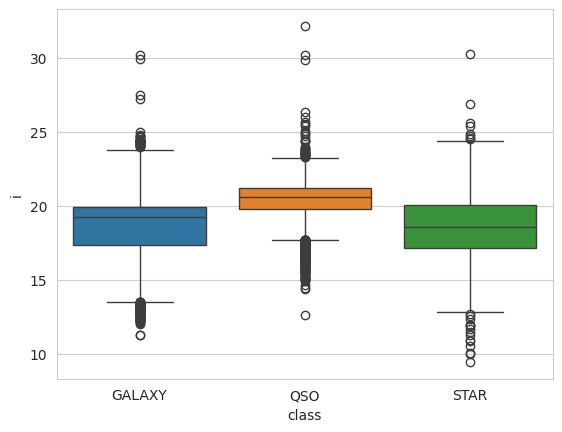

In [229]:
sns.boxplot(x = df["class"], y = df["i"], hue = df["class"])

<Axes: xlabel='class', ylabel='z'>

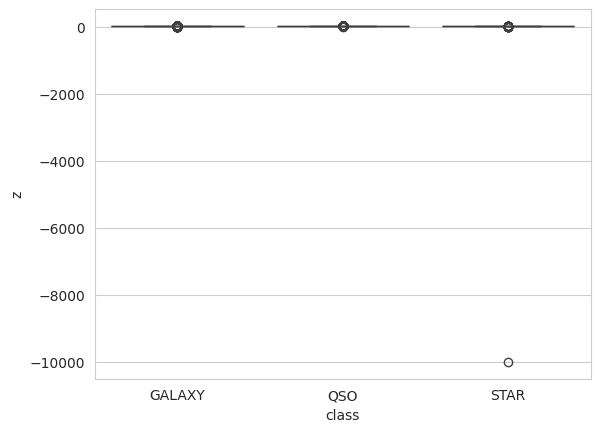

In [230]:
sns.boxplot(x = df["class"], y = df["z"])

Dealing with the outliers of u,g,z features :


In [231]:
Q1 = df["u"].quantile(0.25)
Q3 = df["u"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[df["u"] < lower_bound]   # finding the outliers 


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
4401,1.237662e+18,184.282050,7.624347,14.50678,12.67902,11.74664,11.299560,10.918470,3841,4,130,1.828637e+18,GALAXY,0.007590,1624,53386,639
4472,1.237662e+18,239.423127,28.548438,12.26240,10.51139,10.06854,13.417860,10.225510,3927,4,79,3.383435e+18,STAR,0.000025,3005,54876,384
14227,1.237668e+18,84.217686,4.929016,14.64972,12.63574,12.14340,11.965980,13.130460,5181,4,42,3.198760e+18,STAR,0.000290,2841,54451,284
14498,1.237668e+18,84.230172,7.138590,14.15199,10.73097,9.82207,9.469903,9.612333,5181,4,27,3.198781e+18,STAR,0.000051,2841,54451,362
14829,1.237659e+18,227.304839,52.528432,14.65722,13.16663,12.39703,12.020130,11.798590,3225,4,112,1.311786e+18,GALAXY,0.011695,1165,52703,409
15666,1.237668e+18,84.143381,6.209934,14.26381,12.03599,11.64166,11.515270,12.551280,5181,4,34,3.198790e+18,STAR,0.000158,2841,54451,394
16206,1.237665e+18,201.083866,36.596071,15.15612,14.50097,14.28264,14.164320,14.006180,4470,4,102,2.366723e+18,GALAXY,0.015899,2102,54115,297
17275,1.237650e+18,359.057135,55.901463,14.56906,13.06488,12.52759,12.551100,12.326060,1000,1,72,2.676322e+18,STAR,-0.000160,2377,53991,212
17874,1.237665e+18,190.322829,29.153996,14.93182,14.06440,13.96133,14.133640,14.267300,4649,2,57,2.766418e+18,STAR,-0.000268,2457,54180,298
18153,1.237661e+18,171.361535,57.721229,14.92536,13.56020,13.10489,12.830760,12.647980,3697,6,41,1.475020e+18,GALAXY,0.006129,1310,53033,331


In [232]:
df_cleaned = df[(df["u"] >= lower_bound) & (df["u"] <= upper_bound)]

df_cleaned.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


replotting the distribution plots and boxplots for the new cleaned data :

<Axes: xlabel='class', ylabel='u'>

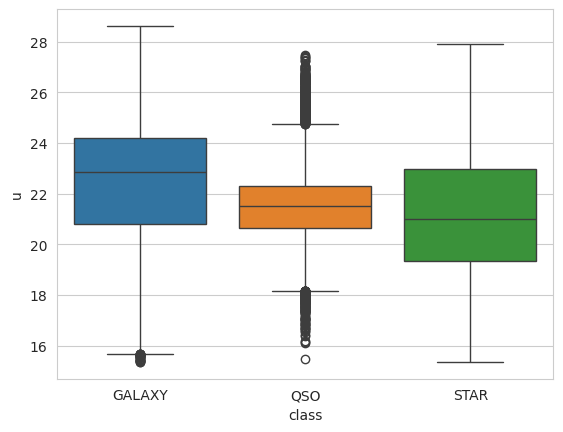

In [233]:
sns.boxplot(x = df_cleaned["class"], y = df_cleaned["u"], hue = df_cleaned["class"])

<Axes: xlabel='class', ylabel='g'>

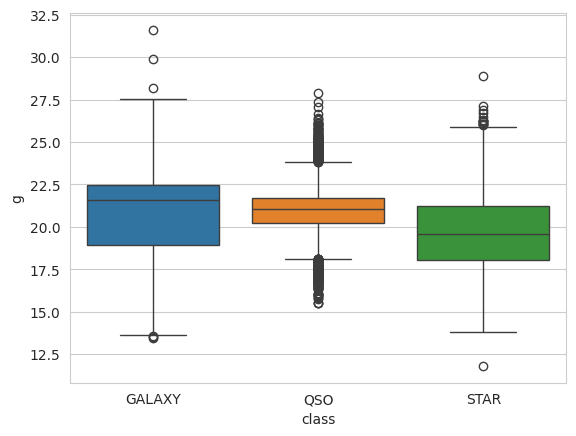

In [234]:
sns.boxplot(x = df_cleaned["class"], y = df_cleaned["g"], hue = df_cleaned["class"])

<Axes: xlabel='class', ylabel='z'>

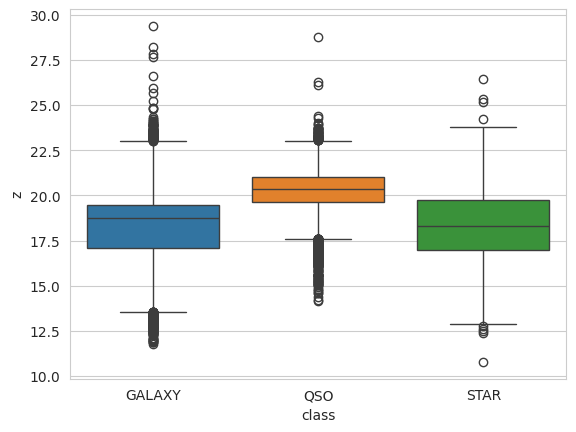

In [235]:
sns.boxplot(x = df_cleaned["class"], y = df_cleaned["z"], hue = df_cleaned["class"])

/tmp/ipykernel_1042/3959219495.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[df_cleaned["class"] == "GALAXY"]["u"], label = "Galaxy")
/tmp/ipykernel_1042/3959219495.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[df_cleaned["class"] == "QSO"]["u"], label = "Quasar

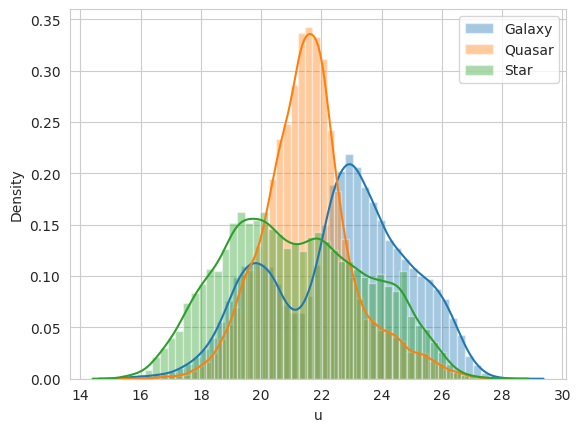

In [236]:
sns.distplot(df_cleaned[df_cleaned["class"] == "GALAXY"]["u"], label = "Galaxy")

sns.distplot(df_cleaned[df_cleaned["class"] == "QSO"]["u"], label = "Quasar")

sns.distplot(df_cleaned[df_cleaned["class"] == "STAR"]["u"], label = "Star")

plt.legend()

/tmp/ipykernel_1042/1444731101.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[df_cleaned["class"] == "GALAXY"]["g"], label = "Galaxy")
/tmp/ipykernel_1042/1444731101.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[df_cleaned["class"] == "QSO"]["g"], label = "Quasar

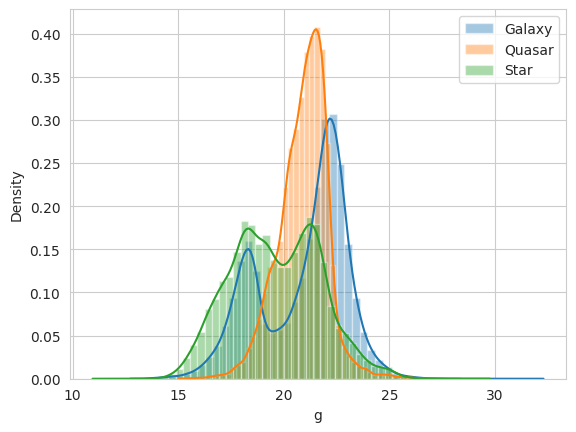

In [237]:
sns.distplot(df_cleaned[df_cleaned["class"] == "GALAXY"]["g"], label = "Galaxy")

sns.distplot(df_cleaned[df_cleaned["class"] == "QSO"]["g"], label = "Quasar")

sns.distplot(df_cleaned[df_cleaned["class"] == "STAR"]["g"], label = "Star")

plt.legend()

/tmp/ipykernel_1042/2932091361.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[df_cleaned["class"] == "GALAXY"]["z"], label = "Galaxy")
/tmp/ipykernel_1042/2932091361.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[df_cleaned["class"] == "QSO"]["z"], label = "Quasar

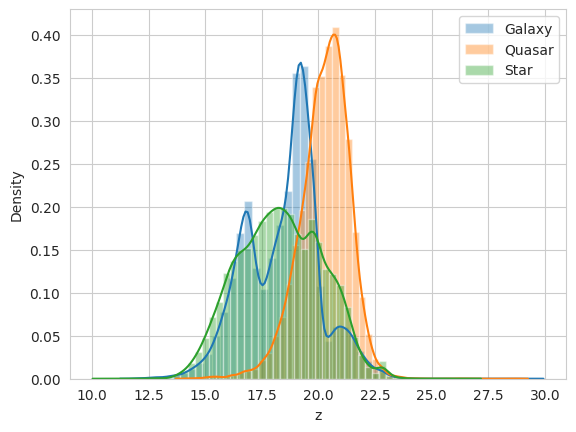

In [238]:
sns.distplot(df_cleaned[df_cleaned["class"] == "GALAXY"]["z"], label = "Galaxy")

sns.distplot(df_cleaned[df_cleaned["class"] == "QSO"]["z"], label = "Quasar")

sns.distplot(df_cleaned[df_cleaned["class"] == "STAR"]["z"], label = "Star")

plt.legend()

Checking the correlation of target class with each feature : 

In [239]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df_cleaned["Encoded_class"] = encoder.fit_transform(df_cleaned["class"])

df_cleaned.head(2)

df_cleaned.drop("class", axis = 1, inplace = True)

/tmp/ipykernel_1042/1432571448.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Encoded_class"] = encoder.fit_transform(df_cleaned["class"])
/tmp/ipykernel_1042/1432571448.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop("class", axis = 1, inplace = True)


<Axes: >

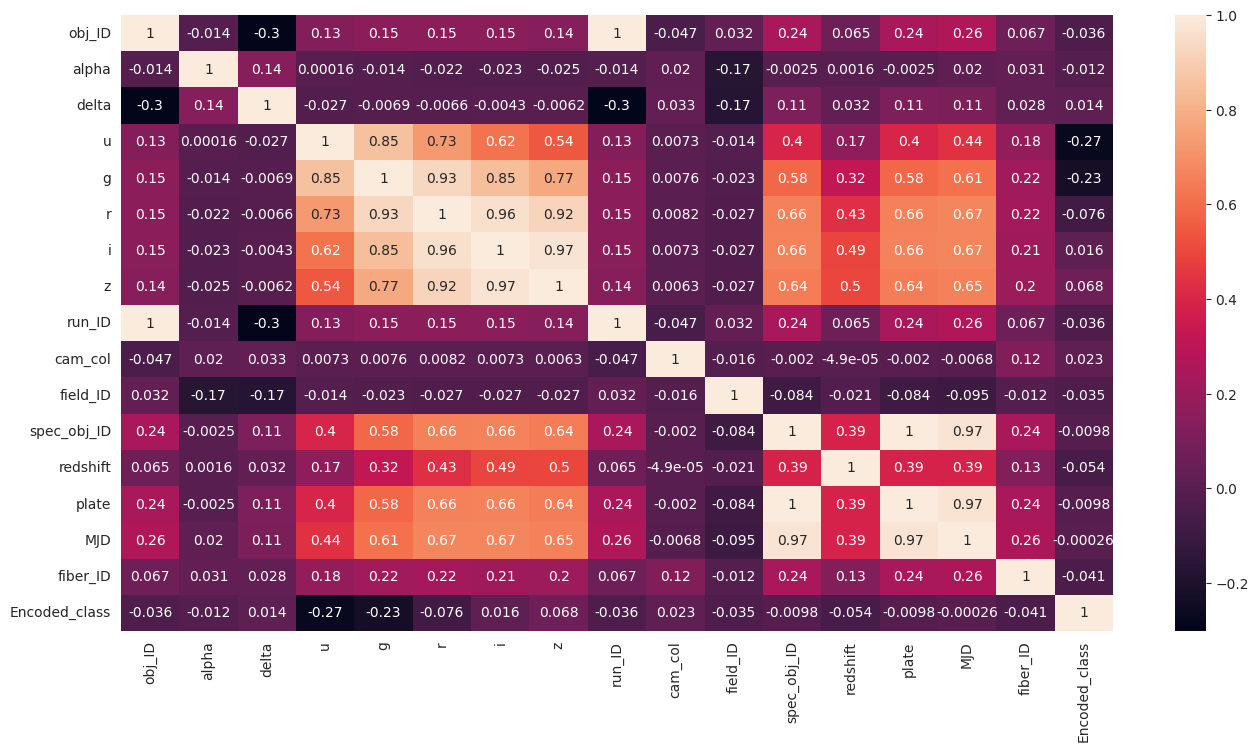

In [240]:
corr = df_cleaned.corr()

plt.figure(figsize= (16, 8))
sns.heatmap(corr, annot = True)

In [241]:
corr["Encoded_class"].sort_values()

u               -0.272733
g               -0.229372
r               -0.075823
redshift        -0.053960
fiber_ID        -0.041494
run_ID          -0.035932
obj_ID          -0.035930
field_ID        -0.034865
alpha           -0.011724
spec_obj_ID     -0.009836
plate           -0.009835
MJD             -0.000260
delta            0.014437
i                0.016117
cam_col          0.023259
z                0.068001
Encoded_class    1.000000
Name: Encoded_class, dtype: float64

Dropping the least relevant columns:

In [250]:
new_df = df_cleaned.drop(["fiber_ID", "run_ID", "obj_ID", "spec_obj_ID", "MJD", "cam_col", "field_ID"], axis = 1)
new_df.head()


,alpha,delta,u,g,r,i,z,redshift,plate,Encoded_class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,5812,0
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,10445,0
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,4576,0
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,9149,0
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,6121,0


### Feature Scaling

Splitting and standardising the feature space : 

In [252]:
X = new_df.drop("Encoded_class", axis = 1)
y = new_df["Encoded_class"]

X.head()

,alpha,delta,u,g,r,i,z,redshift,plate
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,5812
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,10445
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,4576
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,9149
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,6121


In [253]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Encoded_class, dtype: int64

In [245]:
def stand(dataframe):
    ''' Standardize the given dataframe \n
        (Parameters \n 
        dataframe : None
        ) -> dataframe'''

    for i in dataframe.columns:
        dataframe[i] = (dataframe[i] - np.mean(dataframe[i]))/np.std(dataframe[i])

    return dataframe


In [255]:
X = stand(X)
X.head()

,alpha,delta,u,g,r,i,z,redshift,plate
0,-0.434625,0.425520,0.799973,0.807583,0.403564,0.044636,0.012547,0.079232,0.228206
1,-0.339951,0.363397,1.200384,1.081567,1.587709,1.187092,1.613797,0.276769,1.797486
2,-0.367278,0.582694,1.416670,0.998871,0.519711,0.148954,0.100292,0.092097,-0.190450
3,1.669321,-1.249015,0.023895,1.546597,1.061563,0.808489,0.271643,0.486441,1.358507
4,1.737102,-0.150217,-1.178821,-1.503600,-1.704405,-1.774619,-1.831987,-0.630585,0.332870


## KNN implementation

Splitting the data into training and testing datasets :

In [256]:
from sklearn.model_selection import train_test_split

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

training model :

In [258]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error_rate = []

for i in range(1,100):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)

    pred_i = knn.predict(X_test)

    error_rate.append(np.mean(pred_i != y_test))

error_rate

Text(0, 0.5, 'Error rate')

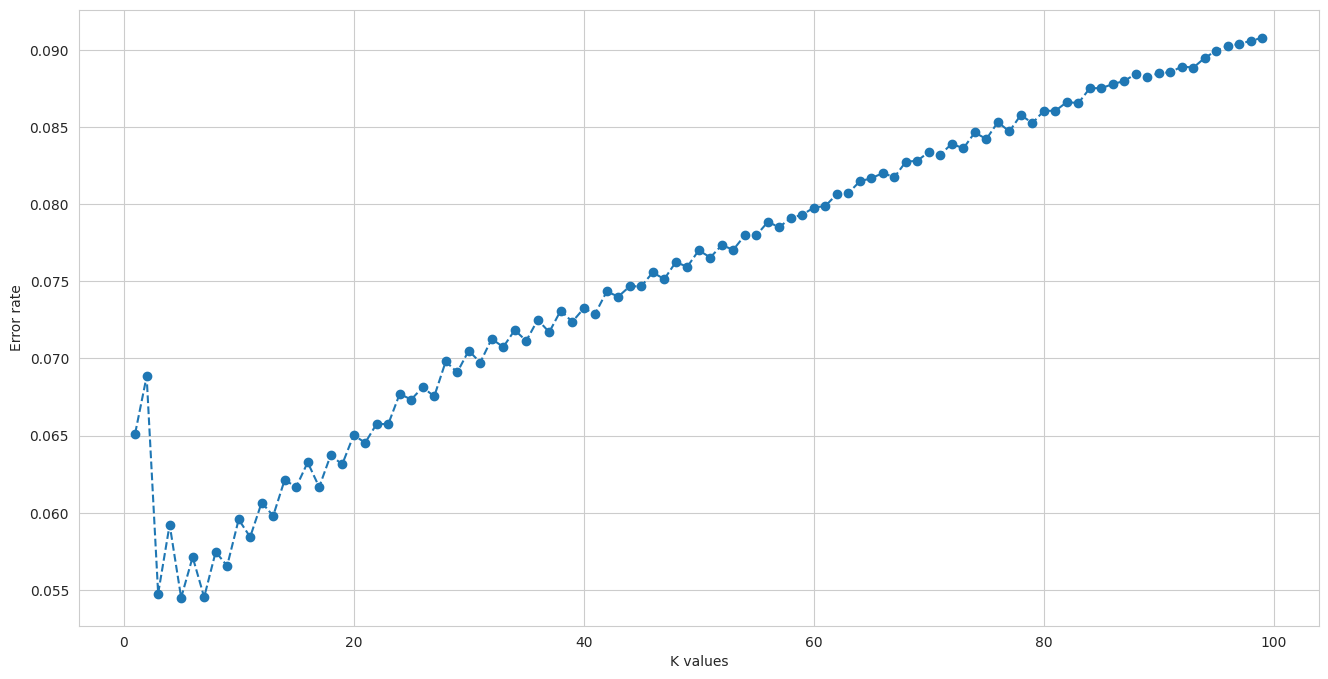

In [265]:
plt.figure(figsize = (16, 8))
plt.plot(range(1,100), error_rate, linestyle = "dashed", marker = "o")

plt.xlabel("K values")
plt.ylabel("Error rate")

In [266]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [267]:
pred = knn.predict(X_test)

Evaluating performance :

In [268]:
from sklearn.metrics import confusion_matrix, classification_report

In [269]:
confusion_matrix(y_pred= pred, y_true= y_test)

array([[17264,   206,   447],
       [  430,  5166,    41],
       [  507,     3,  5920]])

<Axes: >

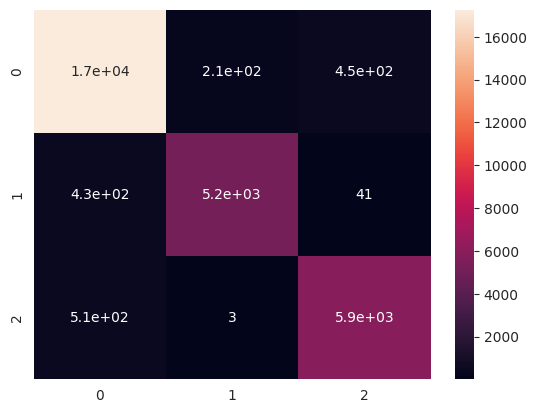

In [274]:
sns.heatmap(confusion_matrix(y_pred = pred, y_true = y_test), annot= True)

In [271]:
print(classification_report(y_pred= pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     17917
           1       0.96      0.92      0.94      5637
           2       0.92      0.92      0.92      6430

    accuracy                           0.95     29984
   macro avg       0.94      0.93      0.94     29984
weighted avg       0.95      0.95      0.95     29984

